In [0]:
# Load libraries

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import precision_recall_fscore_support
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import scikitplot as skplt

In [0]:
#!pip install scikit-plot

In [0]:
def results_report(model,x_te,y_te):
    metrics={}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_te).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    #plt.bar(metrics.keys(),metrics.values())
    #plt.show()
    return metrics

In [0]:
resultats={}

In [8]:
#liste des fichiers
os.listdir()

['.config', 'Aggregation.txt', 'flame.txt', 'spiral.txt', 'sample_data']

EXPLORATION DES DONNEES

In [0]:
#lecture du fichier
data=pd.read_csv('flame.txt', sep='\t', header=None)

In [159]:
data.head()

,0,1,2
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3180b03c8>,
      dtype=object)

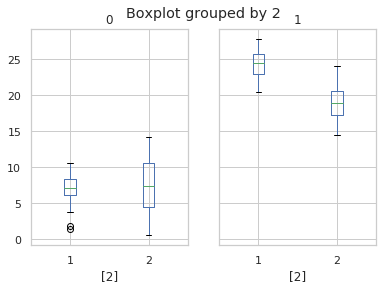

In [160]:
data.boxplot( by=2)

[Text(0.5, 0, 'classe')]

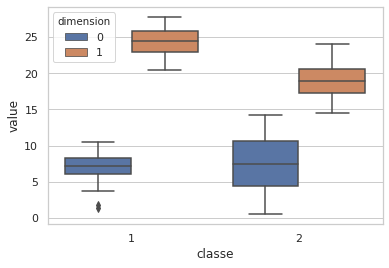

In [161]:
dd=pd.melt(data,id_vars=[2],value_vars=[0,1],var_name='dimension')
ax=sns.boxplot(x=2,y='value',data=dd,hue='dimension')
ax.set(xlabel='classe')

In [162]:
print("nombre de classe %s" % len(set(data[2])))

nombre de classe 2


No handles with labels found to put in legend.


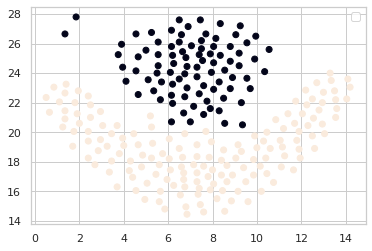

In [163]:
fig, ax = plt.subplots()
plt.scatter(data[0], data[1], c=data[2])
ax.legend()
plt.show()

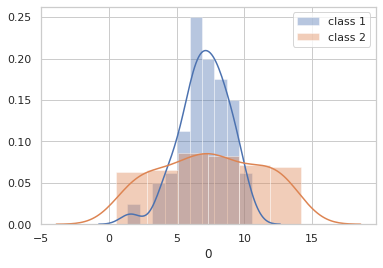

In [164]:
#graph de la premiere dimension en fonction de chaque classe
[sns.distplot(data[0][data[2]==label], label="class {}".format(label)) for label in np.unique(data[2])]
plt.legend();

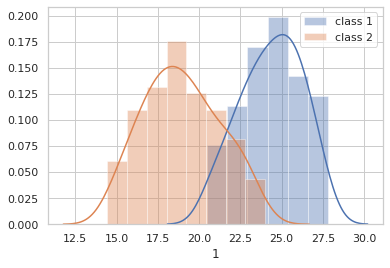

In [165]:
#graphe de la deuxieme dimension en fonction de chaque classe
[sns.distplot(data[1][data[2]==label], label="class {}".format(label)) for label in np.unique(data[2])]
plt.legend();

In [166]:
# Summarize Data

# Load dataset
dataset = data
# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print("types de chaque variable : \n%s\n" % dataset.dtypes)
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())
# class distribution
print("répartition des effectifs dans chaque classe :\n %s\n" % dataset.groupby(2).size())
# head
set_option('display.width', 100)
print("5 premier éléments")
print(dataset.head())



(240, 3)
types de chaque variable : 
0    float64
1    float64
2      int64
dtype: object

             0        1        2
count  240.000  240.000  240.000
mean     7.324   20.929    1.637
std      3.203    3.383    0.482
min      0.500   14.450    1.000
25%      5.250   18.238    1.000
50%      7.300   20.775    2.000
75%      9.312   23.562    2.000
max     14.200   27.800    2.000
répartition des effectifs dans chaque classe :
 2
1     87
2    153
dtype: int64

5 premier éléments
      0      1  2
0  1.85  27.80  1
1  1.35  26.65  1
2  1.40  23.25  2
3  0.85  23.05  2
4  0.50  22.35  2


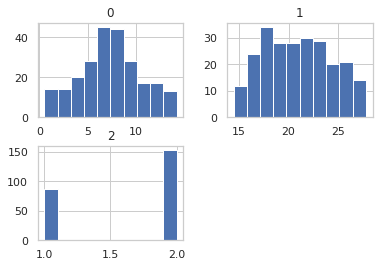

In [167]:
# Data visualizations
# histograms
dataset.hist()
pyplot.show()

In [0]:
## density
#dataset.plot(kind='density', subplots=True, sharex=False, legend=False)
#pyplot.show()
## box and whisker plots
##dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
##pyplot.show()


In [0]:
# scatter plot matrix
#scatter_matrix(dataset)
#pyplot.show()

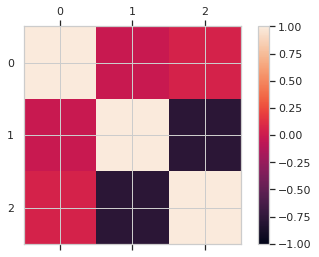

In [169]:

# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset[0:-2].corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

PREPARATION DES DONNEES

In [170]:

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, stratify=Y)
#
sm = SMOTE(random_state = 2) 
X_train, Y_train = sm.fit_sample(X_train, Y_train.ravel()) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [171]:
np.bincount(Y_train.astype(int))

array([  0, 122, 122])

ESTIMATION DES MEILLEURS PARAMETRES POUR CHAUQUE ALGORITHME

In [172]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'roc_auc_ovr'

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('SVM_Linear', LinearSVC( )))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


KNN: 0.999653 (0.001042)
CART: 0.975321 (0.027461)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)
LR: 0.965011 (0.025493)
LDA: 0.963729 (0.025635)


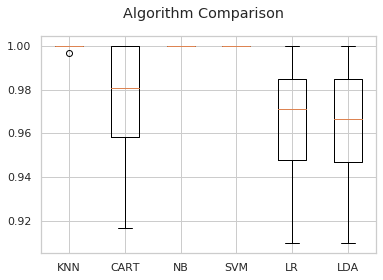

In [173]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



******  RESULTAT POUR KNN ******

accuracy score : 1.0 

Matrice de confusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

KNN

******  RESULTAT POUR CART ******

accuracy score : 1.0 

Matrice de confusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

CART

******  RESULTAT POUR NB ******

accuracy score : 1.0 

Matrice de confusion : 
[[17  0]
 [ 0 31]] 

              precision    r

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0


******  RESULTAT POUR LR ******

accuracy score : 0.8333333333333334 

Matrice de confusion : 
[[16  1]
 [ 7 24]] 

              precision    recall  f1-score   support

         1.0       0.70      0.94      0.80        17
         2.0       0.96      0.77      0.86        31

    accuracy                           0.83        48
   macro avg       0.83      0.86      0.83        48
weighted avg       0.87      0.83      0.84        48

LR

******  RESULTAT POUR LDA ******

accuracy score : 0.8125 

Matrice de confusion : 
[[16  1]
 [ 8 23]] 

              precision    recall  f1-score   support

         1.0       0.67      0.94      0.78        17
         2.0       0.96      0.74      0.84        31

    accuracy                           0.81        48
   macro avg       0.81      0.84      0.81        48
weighted avg       0.86      0.81      0.82        48

LDA


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


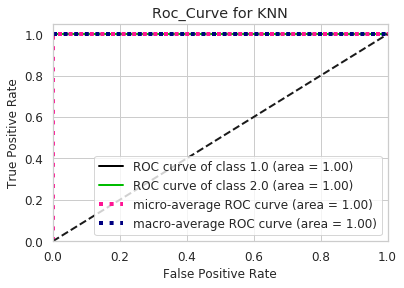

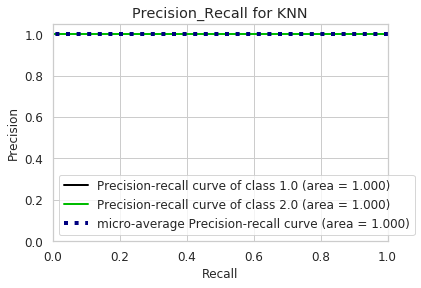

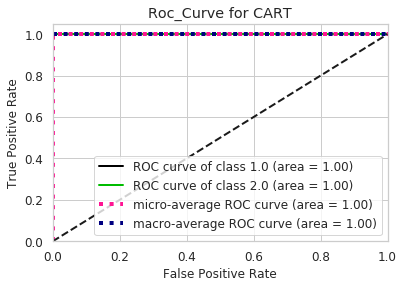

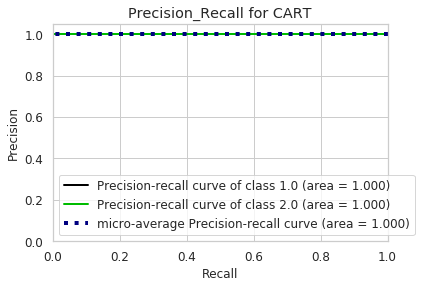

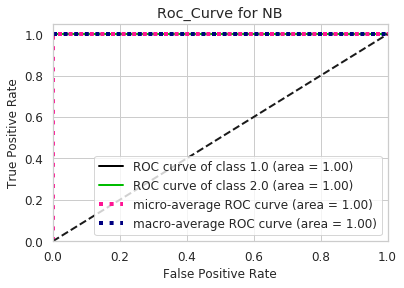

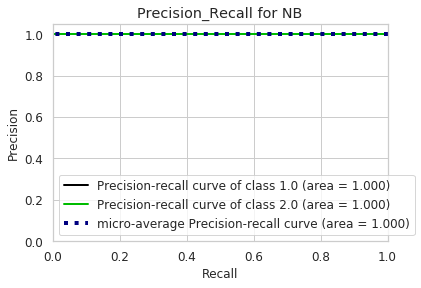

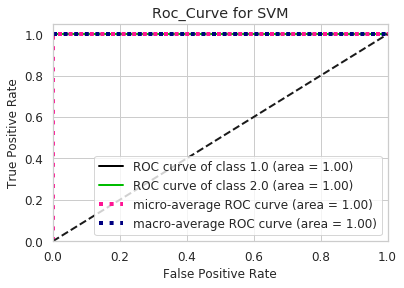

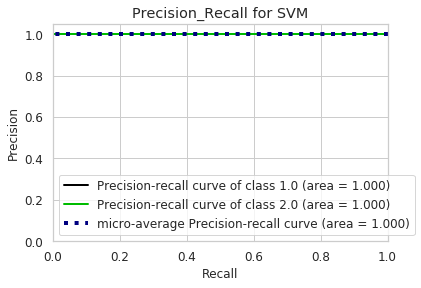

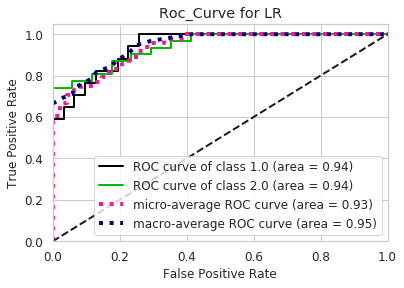

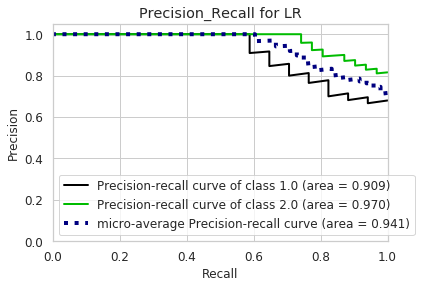

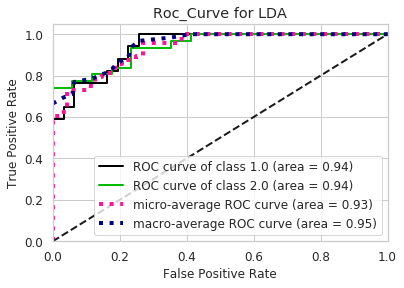

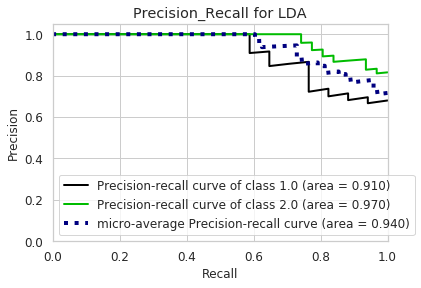

In [174]:
for name, model in models:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None)
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    print(name)
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

In [175]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(probability=True))])))
results = []
names = []
for name, model in pipelines:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.965011 (0.025493)
ScaledLDA: 0.963729 (0.025635)
ScaledKNN: 0.999306 (0.002083)
ScaledCART: 0.975321 (0.027461)
ScaledNB: 1.000000 (0.000000)
ScaledSVM: 1.000000 (0.000000)


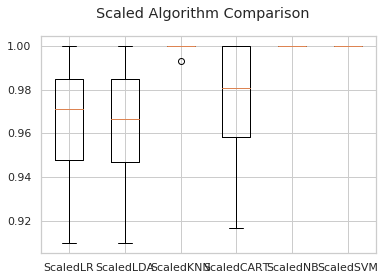

In [176]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



******  RESULTAT POUR ScaledLR ******

accuracy score : 0.8333333333333334 

Matrice de connfusion : 
[[16  1]
 [ 7 24]] 

              precision    recall  f1-score   support

         1.0       0.70      0.94      0.80        17
         2.0       0.96      0.77      0.86        31

    accuracy                           0.83        48
   macro avg       0.83      0.86      0.83        48
weighted avg       0.87      0.83      0.84        48

ScaledLR

******  RESULTAT POUR ScaledLDA ******

accuracy score : 0.8125 

Matrice de connfusion : 
[[16  1]
 [ 8 23]] 

              precision    recall  f1-score   support

         1.0       0.67      0.94      0.78        17
         2.0       0.96      0.74      0.84        31

    accuracy                           0.81        48
   macro avg       0.81      0.84      0.81        48
weighted avg       0.86      0.81      0.82        48

ScaledLDA

******  RESULTAT POUR ScaledKNN ******

accuracy score : 1.0 

Matrice de connfusion : 
[

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0


******  RESULTAT POUR ScaledNB ******

accuracy score : 1.0 

Matrice de connfusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

ScaledNB

******  RESULTAT POUR ScaledSVM ******

accuracy score : 1.0 

Matrice de connfusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

ScaledSVM


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


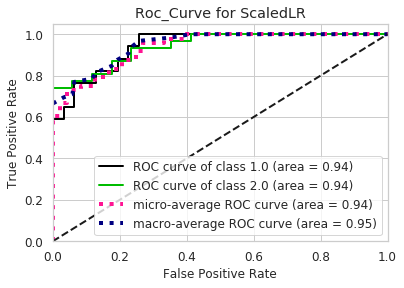

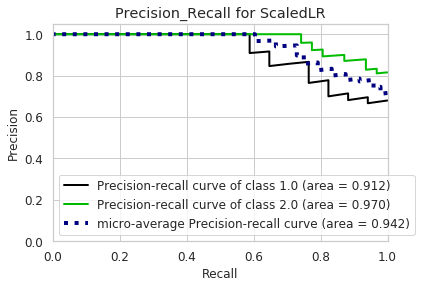

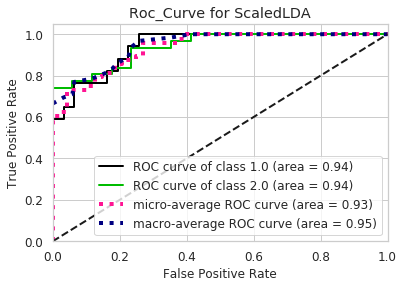

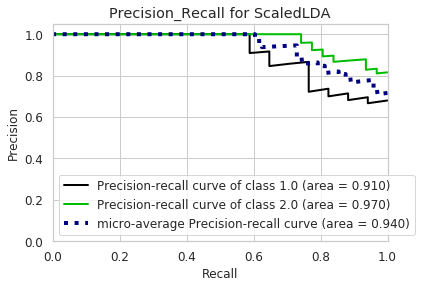

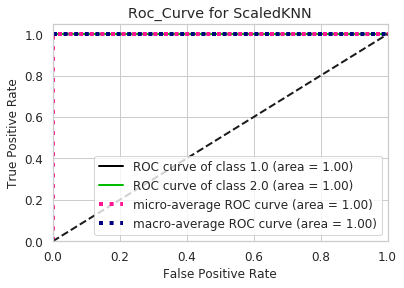

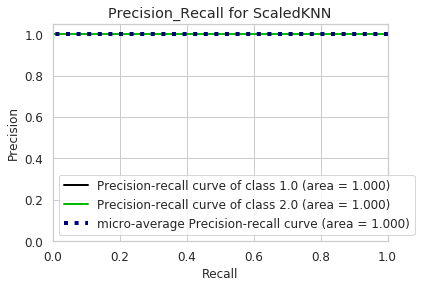

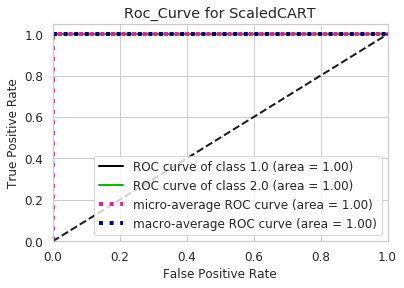

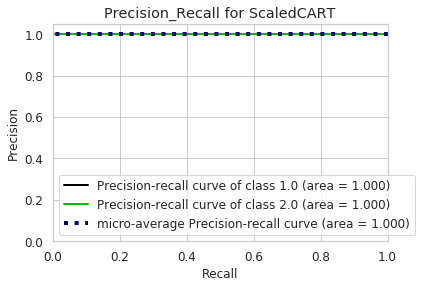

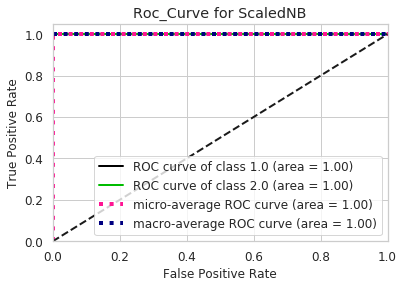

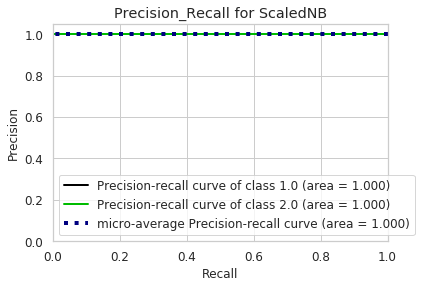

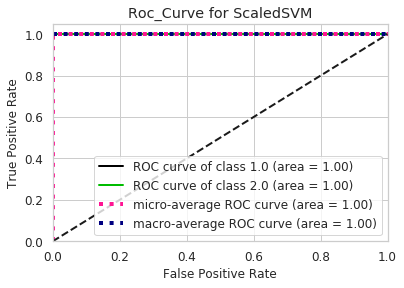

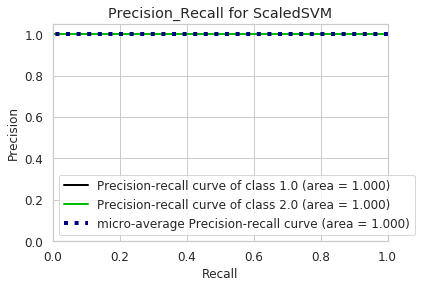

In [177]:
#scales_models=[]
for name, model in pipelines:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de connfusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None) 
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    print(name)
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

In [178]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
0.999306 (0.002083) with: {'n_neighbors': 5}
0.999306 (0.002083) with: {'n_neighbors': 7}
0.999653 (0.001042) with: {'n_neighbors': 9}
0.999306 (0.002083) with: {'n_neighbors': 11}
0.999653 (0.001042) with: {'n_neighbors': 13}
0.999653 (0.001042) with: {'n_neighbors': 15}
0.999653 (0.001042) with: {'n_neighbors': 17}
0.999653 (0.001042) with: {'n_neighbors': 19}
1.000000 (0.000000) with: {'n_neighbors': 21}


In [179]:
# Finalize Model

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = grid_result.best_estimator_.predict(rescaledValidationX)
print("Best KNN using %s\n" % (grid_result.best_params_))
print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Best KNN using {'n_neighbors': 1}

accuracy score : 0.9791666666666666 

Matrice de confusion : 
[[17  0]
 [ 1 30]] 

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        17
         2.0       1.00      0.97      0.98        31

    accuracy                           0.98        48
   macro avg       0.97      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [180]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(probability=True)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 1.000000 using {'C': 0.1, 'kernel': 'rbf'}
0.963675 (0.026734) with: {'C': 0.1, 'kernel': 'linear'}
0.915438 (0.045048) with: {'C': 0.1, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.1, 'kernel': 'rbf'}
0.964263 (0.026207) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.962981 (0.027131) with: {'C': 0.3, 'kernel': 'linear'}
0.919498 (0.039931) with: {'C': 0.3, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.3, 'kernel': 'rbf'}
0.969017 (0.020979) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.962981 (0.027131) with: {'C': 0.5, 'kernel': 'linear'}
0.922062 (0.040283) with: {'C': 0.5, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.5, 'kernel': 'rbf'}
0.976095 (0.019348) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.965011 (0.025972) with: {'C': 0.7, 'kernel': 'linear'}
0.928205 (0.036360) with: {'C': 0.7, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.7, 'kernel': 'rbf'}
0.958814 (0.025753) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.965011 (0.025972) with: {'C': 0.9, 'kernel': 'linear'

In [181]:

# Finalize Model

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = grid_result.best_estimator_.predict(rescaledValidationX)
print("Best SVM using %s\n" % (grid_result.best_params_))
print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))


Best SVM using {'C': 0.1, 'kernel': 'rbf'}

accuracy score : 1.0 

Matrice de confusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [182]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.991373 (0.015002)
GBM: 0.999306 (0.002083)
RF: 1.000000 (0.000000)
ET: 1.000000 (0.000000)


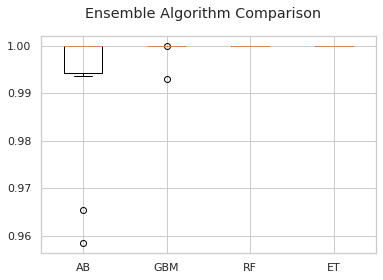

In [183]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


******  RESULTAT POUR AB ******

accuracy score : 0.9375 

Matrice de connfusion : 
[[16  1]
 [ 2 29]] 

              precision    recall  f1-score   support

         1.0       0.89      0.94      0.91        17
         2.0       0.97      0.94      0.95        31

    accuracy                           0.94        48
   macro avg       0.93      0.94      0.93        48
weighted avg       0.94      0.94      0.94        48


******  RESULTAT POUR GBM ******



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


accuracy score : 1.0 

Matrice de connfusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


******  RESULTAT POUR RF ******

accuracy score : 1.0 

Matrice de connfusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        31

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


******  RESULTAT POUR ET ******

accuracy score : 1.0 

Matrice de connfusion : 
[[17  0]
 [ 0 31]] 

              precision    recall  f1-score   support

         1.0    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


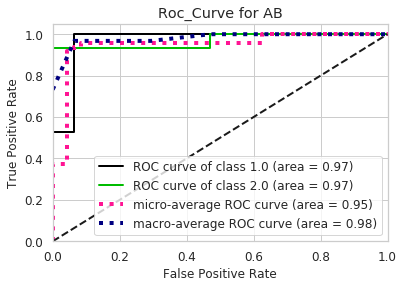

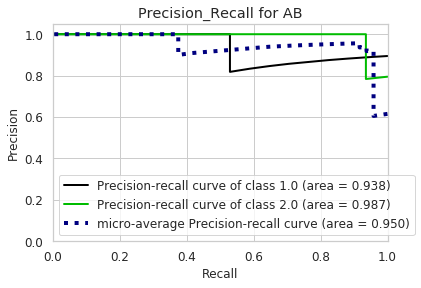

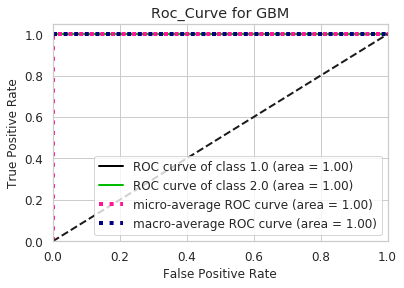

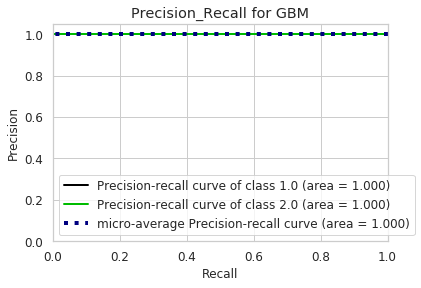

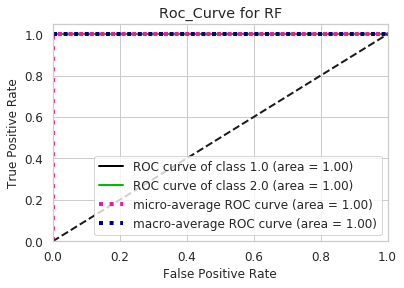

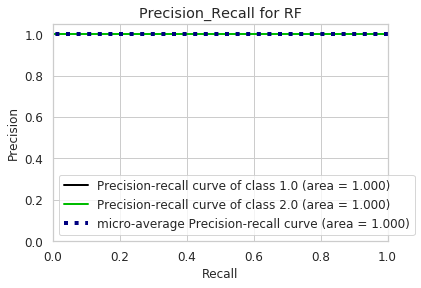

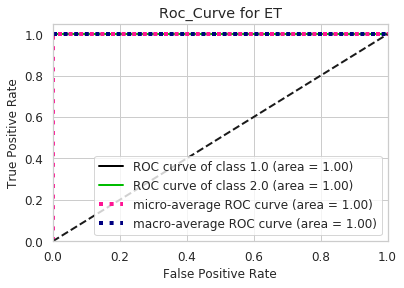

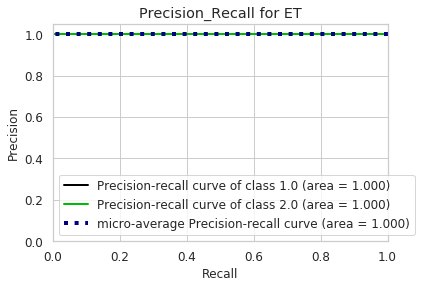

In [184]:
for name, model in ensembles:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de connfusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None)
  
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

ESTIMATION DES METRICS POUR CHAQUE ALGORITHME

In [185]:
m = pd.DataFrame.from_dict(resultats).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,recall,f_1_score,roc_auc_score
KNN,1.000,1.000,1.000,1.000
CART,1.000,1.000,1.000,1.000
NB,1.000,1.000,1.000,1.000
SVM,1.000,1.000,1.000,1.000
ScaledKNN,1.000,1.000,1.000,1.000
ScaledCART,1.000,1.000,1.000,1.000
ScaledNB,1.000,1.000,1.000,1.000
ScaledSVM,1.000,1.000,1.000,1.000
GBM,1.000,1.000,1.000,1.000
RF,1.000,1.000,1.000,1.000
